In [24]:
import os
import yaml
from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np

from mejiro.analysis import lensing
from mejiro.plots import corner
from mejiro.utils import util

# read configuration file
import mejiro
config_file = os.path.join(os.path.dirname(mejiro.__file__), 'data', 'mejiro_config', 'roman_test.yaml')
with open(config_file, 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

if config['dev']:
    config['pipeline_label'] += '_dev'

In [25]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '03')

pickles = sorted(glob(os.path.join(data_dir, 'subhalos', 'subhalo_realization_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 768 pickle(s) in /data/bwedig/mejiro/roman_test_dev/03


In [26]:
sample_realization = util.unpickle(pickles[0])
print(sample_realization)

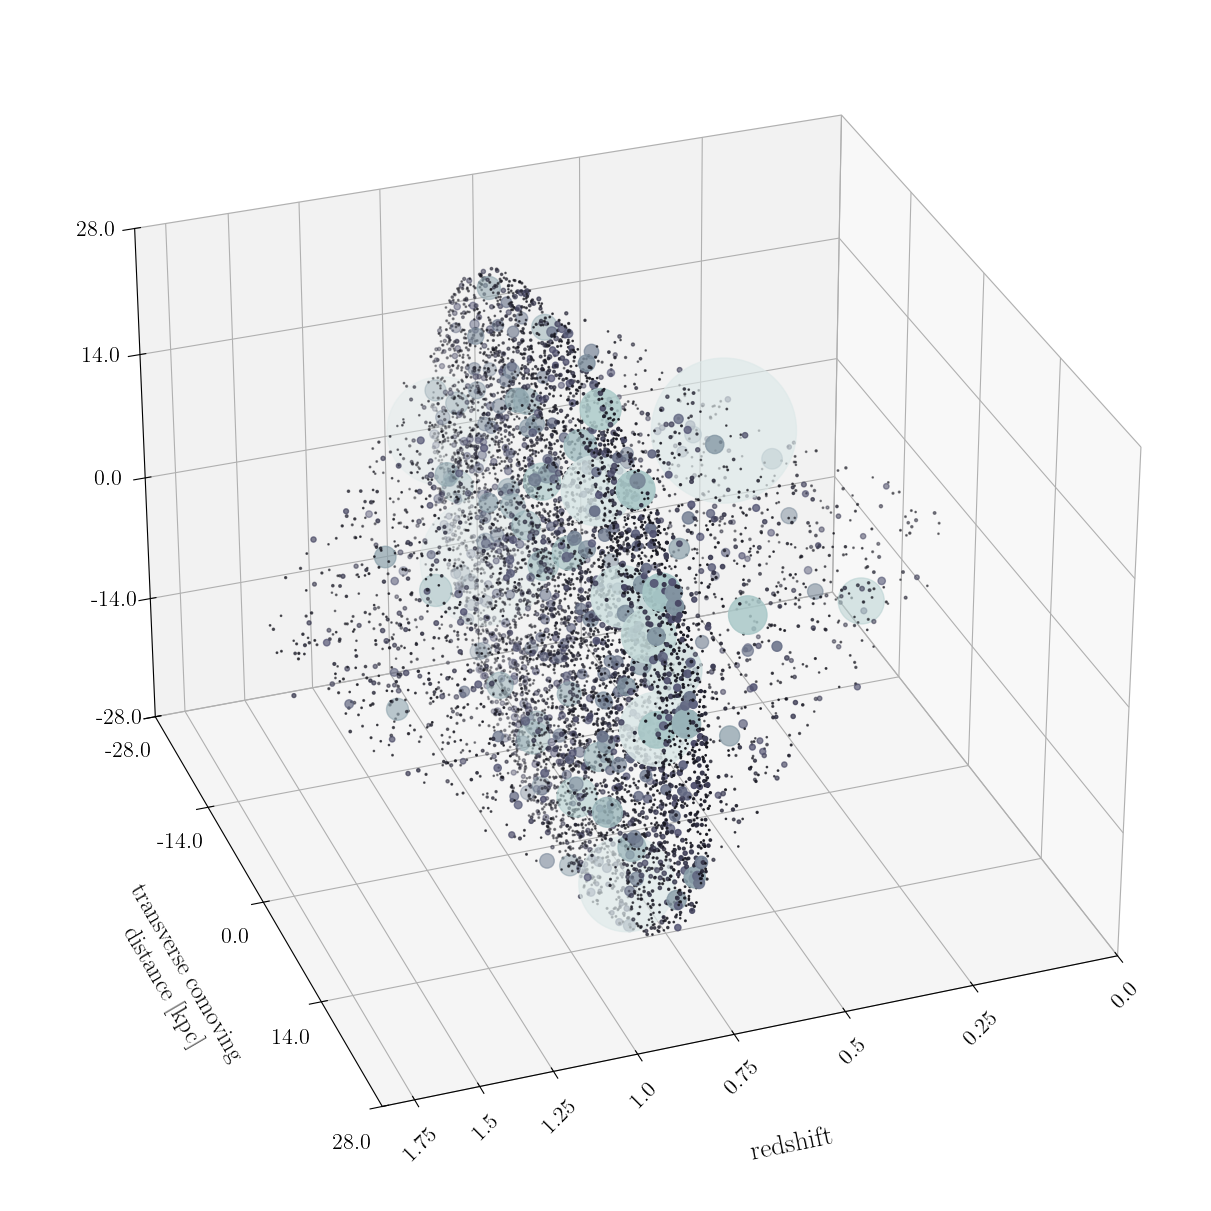

In [27]:
f = plt.figure(figsize=(14, 12))
ax = f.add_subplot(111, projection='3d')
sample_realization.plot(ax)

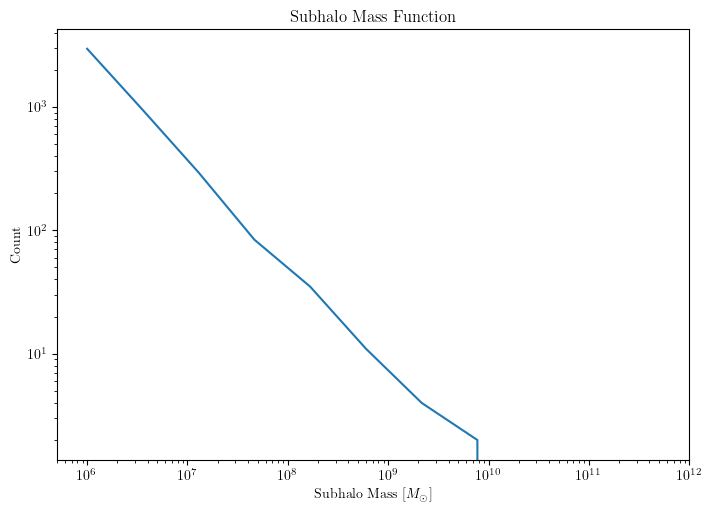

In [28]:
plt.loglog(*lensing.get_subhalo_mass_function(sample_realization))
plt.title('Subhalo Mass Function')
plt.xlabel('Subhalo Mass [$M_\odot$]')
plt.ylabel('Count')
plt.xlim(5e5, 1e12)
plt.show()

In [29]:
largest_halo = max(sample_realization.halos, key=lambda halo: halo.mass)
print(f'Largest halo has mass {largest_halo.mass:.2e} Msun\n')

pprint(largest_halo.__dict__)

Largest halo has mass 1.44e+10 Msun

{'_args': {},
 '_c': 7.974745354789095,
 '_concentration_class': <pyHalo.Halos.concentration.ConcentrationLudlow object at 0x7f17368d04f0>,
 '_kwargs_lenstronomy': [{'Rs': 0.9198010436,
                          'alpha_Rs': 0.0158706594,
                          'center_x': -0.2375,
                          'center_y': 1.6276,
                          'r_trunc': 11.642592589611814}],
 '_lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f1730ae2290>,
 '_nfw_params': [5376583.468288106, 5.4633222120931455, 43.5686034326059],
 '_profile_args': (7.974745354789095, 69.16084692170391),
 '_rescale_norm': 1.0,
 '_rescaled_once': False,
 '_truncation_class': <pyHalo.Halos.tidal_truncation.TruncationRN object at 0x7f17368d16c0>,
 '_zeval': 0.45,
 'fixed_position': False,
 'is_subhalo': False,
 'lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7f1730ae2290>,
 'mass': 14387194497.66487,
 'mdef': 'TNFW',
 'r3d': None,
 'tnfw_lenstronomy'

# Review failed systems

In [30]:
lenses = util.unpickle_all(os.path.join(data_dir, 'sca*'), prefix="lens_")
print(f'Found {len(lenses)} system(s) in {data_dir}')

Found 768 system(s) in /data/bwedig/mejiro/roman_test_dev/03


In [31]:
failed_lenses = util.unpickle_all(data_dir, prefix="failed_")
print(f'{len(failed_lenses)} failed out of {len(lenses)} systems, {len(failed_lenses) / len(lenses) * 100:.2f} percent')

4 failed out of 768 systems, 0.52 percent


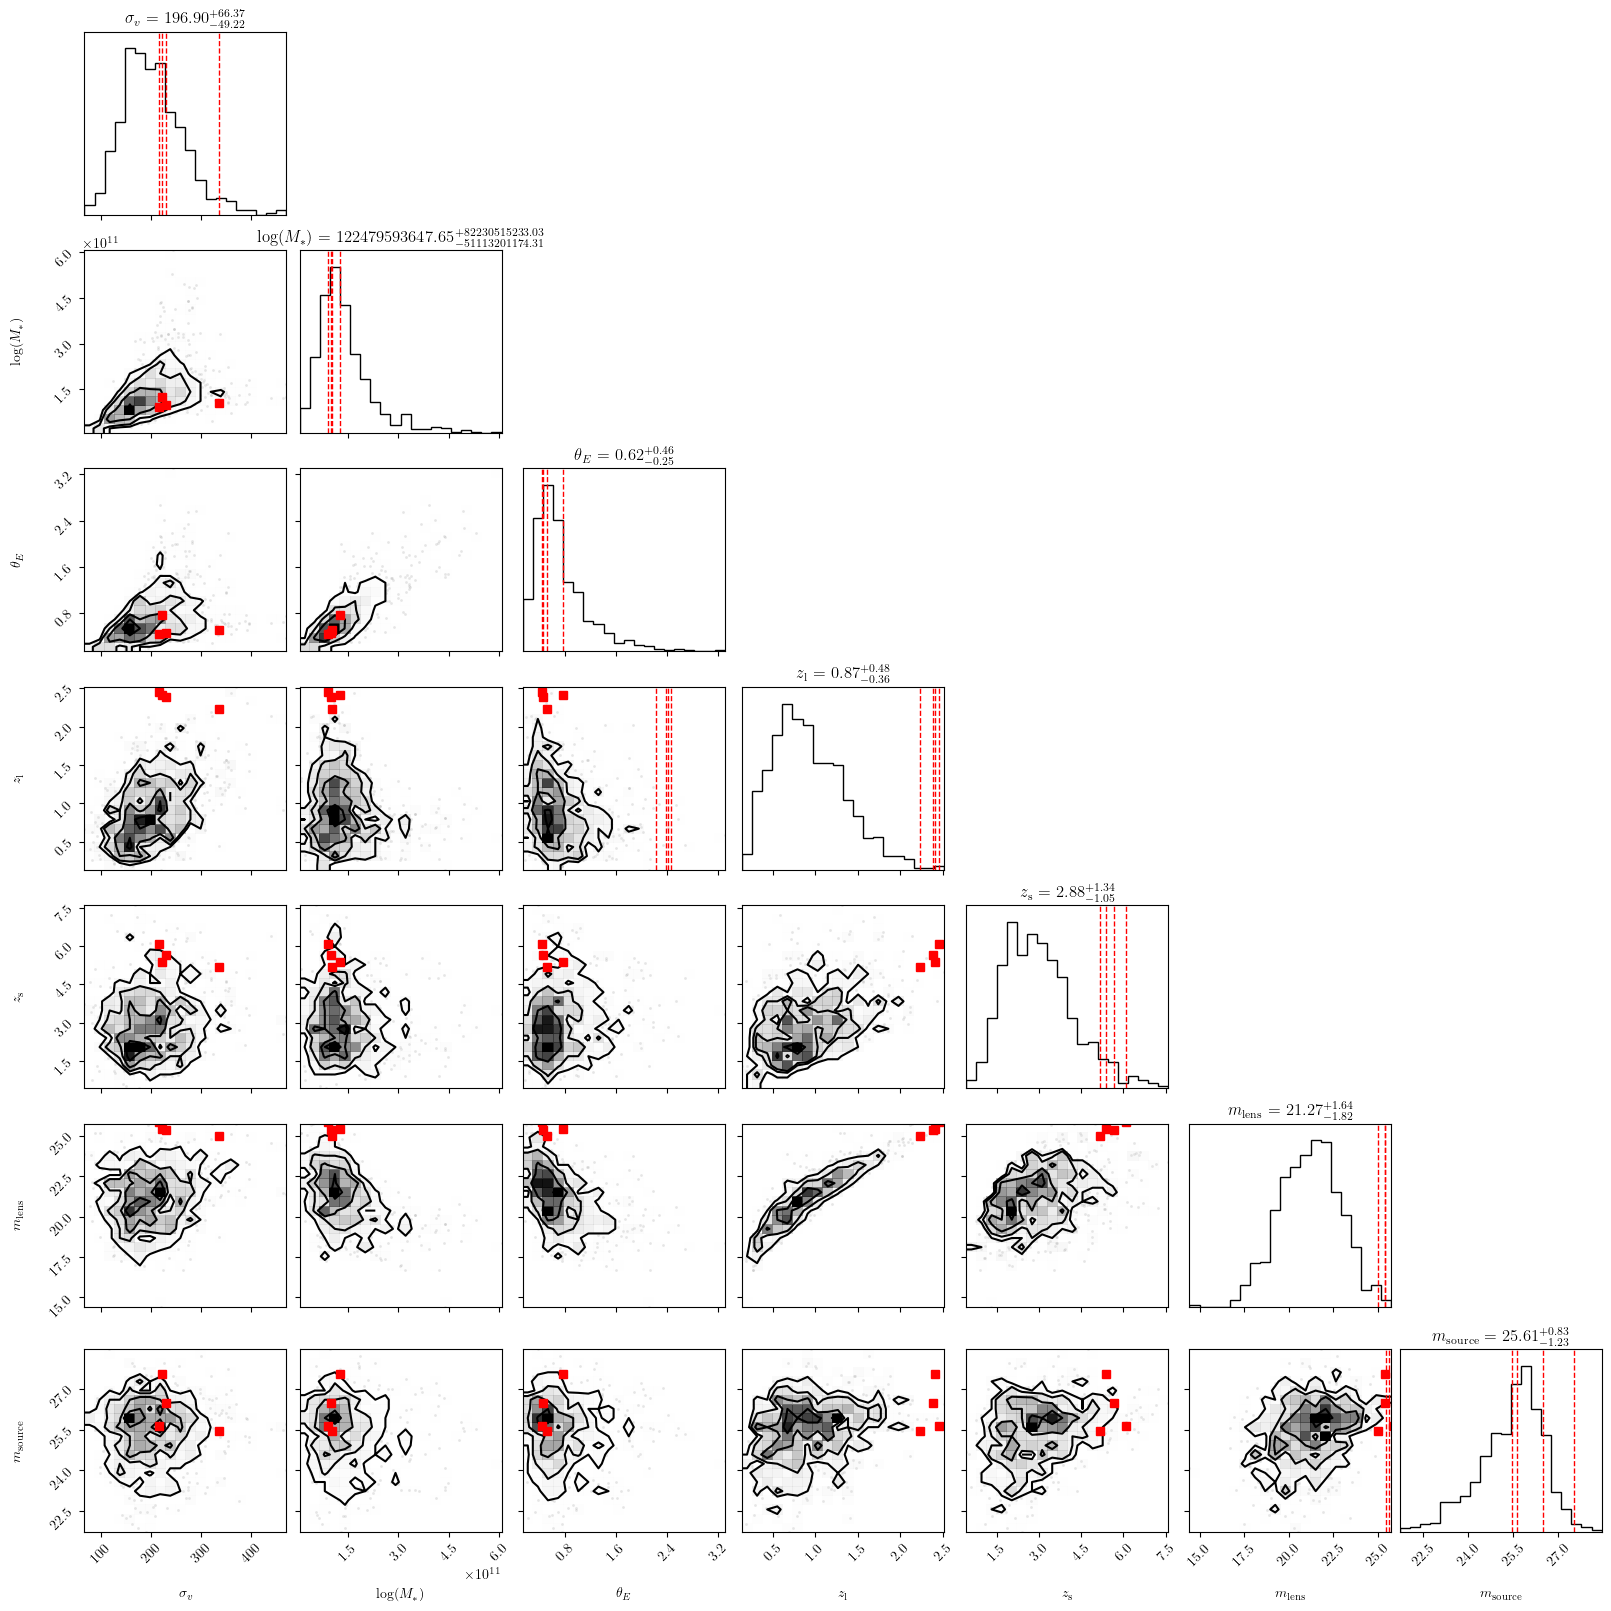

In [32]:
total_corner = corner.overview(lenses, 'F129', quantiles=None)
corner.overplot_points(total_corner, failed_lenses)

In [33]:
from pyHalo.preset_models import preset_model_from_name

sample_failed = failed_lenses[0]

CDM = preset_model_from_name('CDM')
realization = CDM(round(sample_failed.z_lens, 2), round(sample_failed.z_source, 2), cone_opening_angle_arcsec=5, log_m_host=np.log10(sample_failed.get_main_halo_mass()))

sample_failed.add_realization(realization, use_jax=False)

Exception: R = 0.00e+00 is too small (min. R = 1.00e-03)